In this notebook i will walk you through how to implment your own Logistic Regression Classifier using only numpy package.After building we will also train it on a small dataset fro predicting whther a person will buy or not the insurance depending on his/her age. 
I will try to implement this with a neural nework mindset that is i will help you understand how forward pass and backward pass works in neural nets

###STEP 1:-IMPORTING NECESSARY PACKAGES

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

###STEP 2:-UNDERSTANDING THE BASICS
* In logistic regression we try to first fit a linear line separating one class from another(this step is same as Linear Regression)
* Then we pass apply sigmoid activation to the real number that we got
* sigmoid(z)=1/(1+e^(-z))
* suppose we have a feature x then we will multiply it with a real number w and then add b (intercept number) to get z=w*x+b
* the we apply sigmoid to z to get a.a=sigmoid(z)
* but how do we know what is w,b
* firstly we intialize w,b with random number or zero
* then we do one step forward pass that is compute z=w*x+b then a=sigmoid(z)
* then after that we try to adjust the parameters using gradient descent i.e. w=w-(alpha)*(dL/dw) and b=b-(alpha)*(dL/db)
* alpha is called the  learning rate.It is a hyper parameter changing its value we can fine tune our model to get better resuts
* L=loss,it is a metric that helps us and our model to judge how our machine learning model is doing
* dL/dw=rate of change of loss w.r.t w
* formula for loss that we will use is
  L(y,y')=-(y*log(y')+(1-y)*log(1-y'))
* y is actual output
* y' is predicted output
* we use this loss function because it is convex in nature and thus we will be able to reach global optimum with gradient descent
* i have tried to summarize all the above points in a diagram(hope it helps)
* If we want to train a logistic regression having more number of parameters the we can simply change w to a numpy atrix of shape(1,nx) where nx=number of input features
* and we also need to change x to shape(nx,m) where m is the number of training example
*lets dive into the implmentation part now

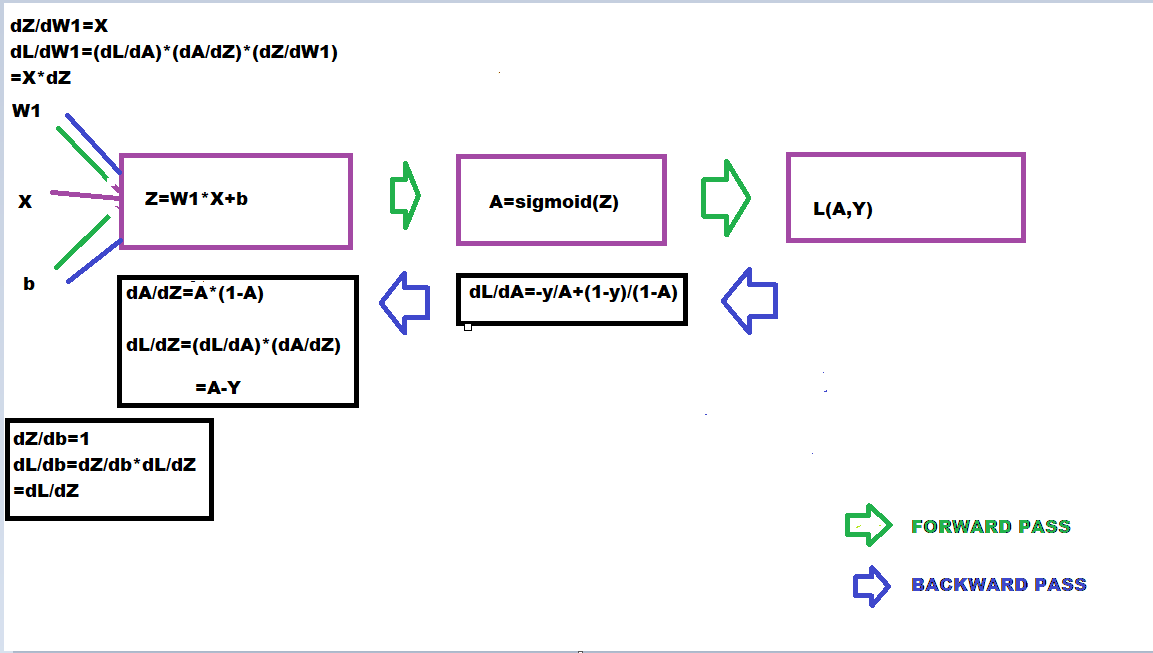

###STEP 3:CODING
* I have define whole logistic regerssion model as a class
* the  class has two data members w,b
* w should be numpy matrix of shape(1,nx) where nx is the number of imput features
* b should be a real number
* the function predict as name suggests is used for prediction purpose. It simply takes a matrix of shape (nx,m) and returns a numpy matrix of shape (1,m) where (1,j) is 1 if it is a postive example else 0
* loss function calculates loss 
* score method simply calculates how many right prediction we made
* Gradient_descent is the heart of the class as inside that only we r doing both forward and backward pass as expalined in the diagram.
* the fit function simply intialises the w,b and then call the gradient descent.Remember when we made the object of the class we simply intialised w=[[0]] i.e. a numoy matrix of 0 with shape (1,1) ,as we have no idea about nx.But in fit function we have x_train which if of shape (nx,m) hence here we r actually definng the matrix
* lastly whenever u see d(any_variable_name) like dZ or dA then it mean dL/d(any_variable_name) like dz is = dL/dZ

In [ ]:
class LogisticRegression():

  def __init__(self):

    #intialising the class variables 
    #nx=number of input fetures
    #w=weight matrix for logistic regerssion
    #b =the intercept term

    self.nx=1
    self.w=np.zeros((1,self.nx))
    self.b=0
 
  def predict(self,x_test):
    
    #claculating z=(w.T)*x+b
    #applyign sigmoid activation to z,y_pred=sigmoid(z)
    #predciting 1 if y_pred[i]>0.5 else 0

    z=np.dot(self.w.T,x_test)+self.b
    y_pred=self.sigmoid(z)
    for i in range(y_pred.shape[1]):
      if(y_pred[0][i]>0.5):
         y_pred[0][i]=1
      else:
        y_pred[0][i]=0
    return y_pred
 
  def loss(self,y_true,y_pred):

    #calculating logistic loss
    #see carefully i have added one extra 1 inside log() (see the formula mentioned in the figure) to get rid of this message 
    #'RuntimeWarning: divide by zero encountered in log' 
    # mathematically y_pred <1 and y_pred>0 but due to roundng error this can happen
    return -1/y_true.shape[1]*np.sum((np.dot(y_true,np.log(1+y_pred).T)+np.dot(1-y_true,np.log(1+1-y_pred).T)))

  def score(self,y_true,y_pred):
    #calculating the number of correct prediction
    c=0
    y_true=y_true.to_numpy()
    for i in range(y_true.shape[1]):
      if(int(y_true[0][i])==int(y_pred[0][i])):
        c=c+1
    return c
  
  def sigmoid(self,z):
    #computing sigmoid of z,z can be a real number,matrixor numpy array
    return 1/(1+np.exp(-1*z))
    
  def gradient_descent(self,x_train,y_train,learning_rate,epochs):
    #in this function i am trying to perform epochs time both foraward and backward pass
    m=x_train.shape[1]
    for i in range(epochs):
      #start of forward pass
      Z=np.dot(self.w.T,x_train)+self.b
      A=self.sigmoid(Z)
      J=self.loss(y_train,A)
      #end of forward pass
      #start of backward pass .see we r not calculating dA i.e. dL/dA as shown in figure because we dnot need it
      dZ=A-y_train
      dw=1/m*np.dot(x_train,dZ.T)
      db=1/m*np.sum(dZ,axis=1)[0]
      #end of backward pass
      #updating the parameters
      self.w=self.w-learning_rate*dw
      self.b=self.b-learning_rate*db
    return 

  def fit(self,x_train,y_train,learning_rate=0.0001,epochs=100):
    #function for fitting the parameters w,b
    self.w=np.zeros((x_train.shape[0],1))
    self.b=0.0
    self.gradient_descent(x_train,y_train,learning_rate,epochs)
    return
#end of class

###STEP 4:-READING THE CSV AND DOING EDA

In [ ]:
df = pd.read_csv("../input/insurance-data/insurance_data.csv")
df.head()

In [ ]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

###STEP 5:-IMPORTING SKLEARN TRAN_TEST_SPLIT() TO DO TRAIN_TEST_SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df[['bought_insurance']],train_size=0.8)

In [ ]:
X_train=X_train.T    #remember our model wants x_train to be of shape (nx,m) but in csv we stored x_train as (m,nx) hence we are doing x_train=x_train.T
y_train=y_train.T    #smae reason

In [ ]:
y_train.shape,X_train.shape   #sanity check

### STEP 5:-CRETAING MODEL INSTANCE

In [ ]:
model = LogisticRegression()

###STEP 6:TRAING THE MODEL BY SETTING DESIRABLE HYPER PARAMETERS

In [ ]:
model.fit(X_train, y_train,learning_rate=0.005,epochs=10000)

###STEP 6.B:-GETTING MODEL WEIGHTS AND BIASES

In [ ]:
model.w,model.b

IF YOU WILL DO SOME CALCULATION THEN YOU WILL FIND THAT ALL AGE THAT R >=abs(model.b/model.W) WILL BUY AN INSURANSE

In [ ]:
abs(model.b/model.w)

In [ ]:
X_test=X_test.T   #same reason as of x_train
y_test=y_test.T   #same reason as of y_train

In [ ]:
X_test

In [ ]:
X_test.shape

In [ ]:
y_test.shape

###STEP 7:-PREDICTINNG THE OUTPUT

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
y_predicted

###STEP 8:-LOOKING AT THE SCORE OF MODEL

In [ ]:
model.score(y_test,y_predicted)

In [ ]:
#refrences
# i have learnt the building of logistic regression model from sir ANDREW NG deeplearning course
#while the dataset and the eda part was borrowed from codebasics thsi video  https://www.youtube.com/watch?v=zM4VZR0px8E
#i want to thank both of them
#it was not a advertisment nor promotion it was just expressing the gratitude to my teachers
#i am also a begginer so if u find any bug or mistake in the above code please let me know so that i can correct it